In [1]:
import os 
import pandas as pd

from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
from collections import Counter
import seaborn as sn
import random
import matplotlib.pyplot as plt

import numpy as np

In [2]:
lot_df = pd.read_csv('lottery_data_results.csv', index_col=False)
ny_df = pd.read_csv('ny_data_results.csv', index_col=False)
mar_df = pd.read_csv('mar_data_results.csv', index_col=False)
youngest_df = pd.read_csv('youngest_data_results.csv', index_col=False)
sickest_df = pd.read_csv('sickest_data_results.csv', index_col=False)
max_lives_df = pd.read_csv('max_lives_data_results.csv', index_col=False)

### Hispanic

In [3]:
def percent_diff(row):
    return ( (row.death_counts - row.lag_counts) / row.death_counts  ) * 100

def absolute_deviation(median, row):
    return abs(median - row.difference)
def modified_zscore(median, row):
    return (0.6745 * (row.difference - median)) / row.MAD

In [4]:
all_df_list = []

#### Lottery

In [5]:
race_var  = 'Black or African American'
hispanic_df = lot_df[lot_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Lottery'


med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
7,Black or African American,50.000,0.0,487.000,76.923077,NaN,46.211,3.789,7.578000,Lottery,0.9735,0.7395,-0.887932,0
18,Black or African American,46.211,0.1,437.899,71.093846,NaN,40.615,5.596,12.109671,Lottery,0.8335,0.7395,0.760238,0
24,Black or African American,40.615,0.2,400.117,62.484615,NaN,36.817,3.798,9.351225,Lottery,0.9645,0.7395,-0.879723,0
32,Black or African American,36.817,0.3,360.875,56.641538,NaN,31.409,5.408,14.688867,Lottery,0.6455,0.7395,0.588762,0
41,Black or African American,31.409,0.4,318.644,48.321538,NaN,26.572,4.837,15.400045,Lottery,0.0745,0.7395,0.067952,0
48,Black or African American,26.572,0.5,272.878,40.880000,NaN,20.259,6.313,23.758091,Lottery,1.5505,0.7395,1.414215,0
57,Black or African American,20.259,0.6,222.977,31.167692,NaN,15.571,4.688,23.140333,Lottery,0.0745,0.7395,-0.067952,0
66,Black or African American,15.571,0.7,177.051,23.955385,NaN,10.732,4.839,31.077002,Lottery,0.0765,0.7395,0.069776,0
74,Black or African American,10.732,0.8,124.517,16.510769,NaN,6.220,4.512,42.042490,Lottery,0.2505,0.7395,-0.228482,0
81,Black or African American,6.220,0.9,74.190,9.569231,NaN,3.874,2.346,37.717042,Lottery,2.4165,0.7395,-2.204096,0


#### New York

In [6]:
hispanic_df = ny_df[ny_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'New York'

med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
10,Black or African American,50.000,0.0,487.000,76.923077,NaN,45.624,4.376,8.752000,New York,0.3715,0.632,-0.396482,0
17,Black or African American,45.624,0.1,433.050,70.190769,NaN,43.213,2.411,5.284499,New York,2.3365,0.632,-2.493622,0
25,Black or African American,43.213,0.2,378.396,66.481538,NaN,37.971,5.242,12.130609,New York,0.4945,0.632,0.527754,0
32,Black or African American,37.971,0.3,324.595,58.416923,NaN,33.632,4.339,11.427142,New York,0.4085,0.632,-0.435970,0
42,Black or African American,33.632,0.4,279.014,51.741538,NaN,30.214,3.418,10.162940,New York,1.3295,0.632,-1.418905,0
52,Black or African American,30.214,0.5,233.655,46.483077,NaN,24.946,5.268,17.435626,New York,0.5205,0.632,0.555502,0
58,Black or African American,24.946,0.6,191.496,38.378462,NaN,19.827,5.119,20.520324,New York,0.3715,0.632,0.396482,0
65,Black or African American,19.827,0.7,149.028,30.503077,NaN,15.823,4.004,20.194684,New York,0.7435,0.632,-0.793498,0
70,Black or African American,15.823,0.8,104.948,24.343077,NaN,10.028,5.795,36.623902,New York,1.0475,0.632,1.117941,0
81,Black or African American,10.028,0.9,67.037,15.427692,NaN,3.904,6.124,61.069007,New York,1.3765,0.632,1.469065,0


#### Maryland

In [7]:
hispanic_df = mar_df[mar_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Maryland'

med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
7,Black or African American,50.000,0.0,487.000,76.923077,NaN,48.012,1.988,3.976000,Maryland,3.725,1.5955,-1.574749,0
17,Black or African American,48.012,0.1,432.379,73.864615,NaN,42.064,5.948,12.388570,Maryland,0.235,1.5955,0.099347,0
24,Black or African American,42.064,0.2,379.791,64.713846,NaN,39.174,2.890,6.870483,Maryland,2.823,1.5955,-1.193427,0
35,Black or African American,39.174,0.3,330.041,60.267692,NaN,38.347,0.827,2.111094,Maryland,4.886,1.5955,-2.065564,0
42,Black or African American,38.347,0.4,288.334,58.995385,NaN,36.550,1.797,4.686155,Maryland,3.916,1.5955,-1.655495,0
48,Black or African American,36.550,0.5,243.638,56.230769,NaN,30.928,5.622,15.381669,Maryland,0.091,1.5955,-0.038470,0
57,Black or African American,30.928,0.6,208.782,47.581538,NaN,24.292,6.636,21.456286,Maryland,0.923,1.5955,0.390200,0
64,Black or African American,24.292,0.7,157.018,37.372308,NaN,16.734,7.558,31.113124,Maryland,1.845,1.5955,0.779976,0
72,Black or African American,16.734,0.8,106.540,25.744615,NaN,9.675,7.059,42.183578,Maryland,1.346,1.5955,0.569024,0
78,Black or African American,9.675,0.9,72.091,14.884615,NaN,3.871,5.804,59.989664,Maryland,0.091,1.5955,0.038470,0


#### Youngest

In [8]:
hispanic_df = youngest_df[youngest_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Youngest First'

med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
10,Black or African American,50.000,0.0,487.000,76.923077,NaN,49.306,0.694,1.388000,Youngest First,3.9255,1.173,-2.257246,0
18,Black or African American,49.306,0.1,449.971,75.855385,NaN,45.449,3.857,7.822577,Youngest First,0.7625,1.173,-0.438454,0
23,Black or African American,45.449,0.2,406.845,69.921538,NaN,41.558,3.891,8.561244,Youngest First,0.7285,1.173,-0.418903,0
34,Black or African American,41.558,0.3,363.732,63.935385,NaN,34.486,7.072,17.017181,Youngest First,2.4525,1.173,1.410240,0
42,Black or African American,34.486,0.4,326.387,53.055385,NaN,33.677,0.809,2.345879,Youngest First,3.8105,1.173,-2.191119,0
46,Black or African American,33.677,0.5,282.179,51.810769,NaN,27.982,5.695,16.910651,Youngest First,1.0755,1.173,0.618435,0
56,Black or African American,27.982,0.6,242.113,43.049231,NaN,22.092,5.890,21.049246,Youngest First,1.2705,1.173,0.730565,0
66,Black or African American,22.092,0.7,193.757,33.987692,NaN,17.531,4.561,20.645483,Youngest First,0.0585,1.173,-0.033639,0
72,Black or African American,17.531,0.8,141.023,26.970769,NaN,12.853,4.678,26.684159,Youngest First,0.0585,1.173,0.033639,0
80,Black or African American,12.853,0.9,90.302,19.773846,NaN,3.866,8.987,69.921419,Youngest First,4.3675,1.173,2.511406,0


#### Max Life Years

In [9]:
hispanic_df = max_lives_df[max_lives_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Max Life Years'

med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
10,Black or African American,50.000,0.0,487.000,76.923077,NaN,47.030,2.970,5.940000,Max Life Years,1.713,1.768,-0.653517,0
18,Black or African American,47.030,0.1,432.386,72.353846,NaN,42.075,4.955,10.535828,Max Life Years,0.272,1.768,0.103769,0
25,Black or African American,42.075,0.2,382.825,64.730769,NaN,40.076,1.999,4.751040,Max Life Years,2.684,1.768,-1.023958,0
33,Black or African American,40.076,0.3,330.027,61.655385,NaN,38.285,1.791,4.469009,Max Life Years,2.892,1.768,-1.103311,0
40,Black or African American,38.285,0.4,288.270,58.900000,NaN,31.779,6.506,16.993601,Max Life Years,1.823,1.768,0.695483,0
50,Black or African American,31.779,0.5,252.318,48.890769,NaN,27.162,4.617,14.528462,Max Life Years,0.066,1.768,-0.025179,0
57,Black or African American,27.162,0.6,212.753,41.787692,NaN,22.413,4.749,17.483985,Max Life Years,0.066,1.768,0.025179,0
65,Black or African American,22.413,0.7,162.949,34.481538,NaN,15.762,6.651,29.674742,Max Life Years,1.968,1.768,0.750801,0
73,Black or African American,15.762,0.8,108.336,24.249231,NaN,11.500,4.262,27.039716,Max Life Years,0.421,1.768,-0.160613,0
80,Black or African American,11.500,0.9,72.093,17.692308,NaN,3.878,7.622,66.278261,Max Life Years,2.939,1.768,1.121242,0


#### Sickest First

In [10]:
hispanic_df = sickest_df[sickest_df['race'] == race_var]
hispanic_df = hispanic_df[hispanic_df['threshold'] != 1.1]
hispanic_df.sort_values(by=['threshold'], inplace=True)
hispanic_df['lag_counts'] = hispanic_df['death_counts'].shift(-1)
hispanic_df['difference'] = hispanic_df['death_counts'] - hispanic_df['lag_counts']
hispanic_df['percent_difference'] = hispanic_df.apply(lambda row: percent_diff(row), axis=1)
hispanic_df['type'] = 'Sickest First'


med = hispanic_df['difference'].median()
mad_lambda = lambda median: lambda row: absolute_deviation(median, row)
med_func = mad_lambda(med)
hispanic_df['absolute_deviation'] = hispanic_df.apply(lambda row: med_func(row), axis=1)
hispanic_df['MAD'] = hispanic_df['absolute_deviation'].median()
mod_z_lambda = lambda median: lambda row: modified_zscore(median, row)
mod_func = mod_z_lambda(med)
hispanic_df['modified_z_score'] = hispanic_df.apply(lambda row: mod_func(row), axis=1)
hispanic_df['outlier'] = hispanic_df.apply(lambda row: 1 if row.modified_z_score >= 3.5 else 0, axis=1)


all_df_list.append(hispanic_df)
hispanic_df

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
10,Black or African American,50.000,0.0,487.000,76.923077,NaN,43.435,6.565,13.130000,Sickest First,1.2015,1.179,0.687372,0
17,Black or African American,43.435,0.1,454.482,66.823077,NaN,37.096,6.339,14.594221,Sickest First,0.9755,1.179,0.558079,0
25,Black or African American,37.096,0.2,413.206,57.070769,NaN,34.310,2.786,7.510244,Sickest First,2.5775,1.179,-1.474575,0
35,Black or African American,34.310,0.3,369.298,52.784615,NaN,28.692,5.618,16.374235,Sickest First,0.2545,1.179,0.145598,0
38,Black or African American,28.692,0.4,319.314,44.141538,NaN,23.090,5.602,19.524606,Sickest First,0.2385,1.179,0.136445,0
48,Black or African American,23.090,0.5,280.011,35.523077,NaN,16.570,6.520,28.237332,Sickest First,1.1565,1.179,0.661628,0
57,Black or African American,16.570,0.6,234.317,25.492308,NaN,15.572,0.998,6.022933,Sickest First,4.3655,1.179,-2.497481,0
64,Black or African American,15.572,0.7,190.084,23.956923,NaN,12.848,2.724,17.492936,Sickest First,2.6395,1.179,-1.510045,0
72,Black or African American,12.848,0.8,142.671,19.766154,NaN,7.723,5.125,39.889477,Sickest First,0.2385,1.179,-0.136445,0
78,Black or African American,7.723,0.9,91.131,11.881538,NaN,3.910,3.813,49.372006,Sickest First,1.5505,1.179,-0.887033,0


/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Difference Plot For White Patients')

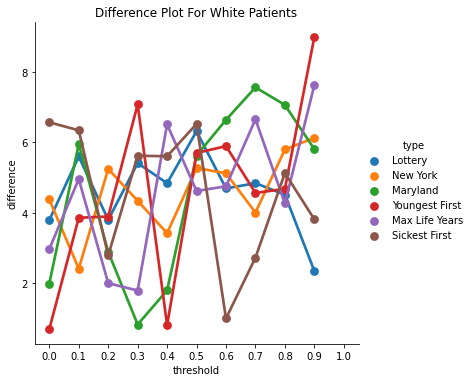

In [11]:
all_df = pd.concat(all_df_list)
type_labels = all_df['type'].unique()
sn_plot = sn.factorplot(x='threshold', y='difference', 
                        hue_order = type_labels, hue='type', data=all_df)
plt.title('Difference Plot For White Patients')

In [12]:
all_df[all_df['type'] == 'Lottery']

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
7,Black or African American,50.000,0.0,487.000,76.923077,NaN,46.211,3.789,7.578000,Lottery,0.9735,0.7395,-0.887932,0
18,Black or African American,46.211,0.1,437.899,71.093846,NaN,40.615,5.596,12.109671,Lottery,0.8335,0.7395,0.760238,0
24,Black or African American,40.615,0.2,400.117,62.484615,NaN,36.817,3.798,9.351225,Lottery,0.9645,0.7395,-0.879723,0
32,Black or African American,36.817,0.3,360.875,56.641538,NaN,31.409,5.408,14.688867,Lottery,0.6455,0.7395,0.588762,0
41,Black or African American,31.409,0.4,318.644,48.321538,NaN,26.572,4.837,15.400045,Lottery,0.0745,0.7395,0.067952,0
48,Black or African American,26.572,0.5,272.878,40.880000,NaN,20.259,6.313,23.758091,Lottery,1.5505,0.7395,1.414215,0
57,Black or African American,20.259,0.6,222.977,31.167692,NaN,15.571,4.688,23.140333,Lottery,0.0745,0.7395,-0.067952,0
66,Black or African American,15.571,0.7,177.051,23.955385,NaN,10.732,4.839,31.077002,Lottery,0.0765,0.7395,0.069776,0
74,Black or African American,10.732,0.8,124.517,16.510769,NaN,6.220,4.512,42.042490,Lottery,0.2505,0.7395,-0.228482,0
81,Black or African American,6.220,0.9,74.190,9.569231,NaN,3.874,2.346,37.717042,Lottery,2.4165,0.7395,-2.204096,0


Text(0.5, 1.0, 'Difference Plot For White Patients Lottery')

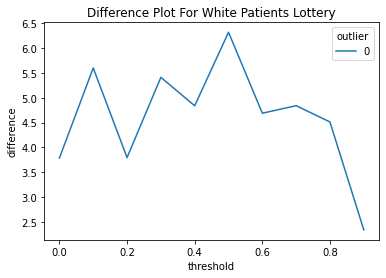

In [13]:
type_labels = all_df['type'].unique()
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'Lottery'])
plt.title('Difference Plot For White Patients Lottery')

Text(0.5, 1.0, 'Difference Plot For White Patients New York')

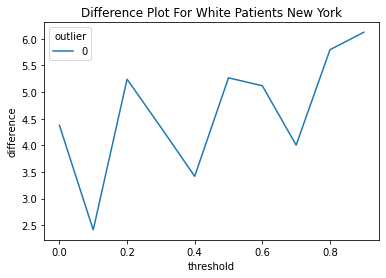

In [14]:
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'New York'])
plt.title('Difference Plot For White Patients New York')

Text(0.5, 1.0, 'Difference Plot For White Patients Maryland')

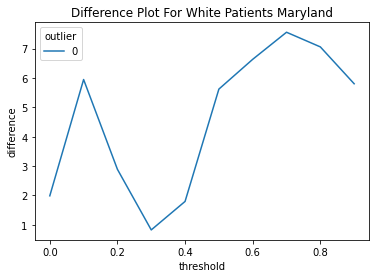

In [15]:
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'Maryland'])
plt.title('Difference Plot For White Patients Maryland')

In [19]:
all_df[all_df['type'] == 'Maryland']

,race,death_counts,threshold,avg_deaths,death_percent,allocation_type,lag_counts,difference,percent_difference,type,absolute_deviation,MAD,modified_z_score,outlier
7,Black or African American,50.000,0.0,487.000,76.923077,NaN,48.012,1.988,3.976000,Maryland,3.725,1.5955,-1.574749,0
17,Black or African American,48.012,0.1,432.379,73.864615,NaN,42.064,5.948,12.388570,Maryland,0.235,1.5955,0.099347,0
24,Black or African American,42.064,0.2,379.791,64.713846,NaN,39.174,2.890,6.870483,Maryland,2.823,1.5955,-1.193427,0
35,Black or African American,39.174,0.3,330.041,60.267692,NaN,38.347,0.827,2.111094,Maryland,4.886,1.5955,-2.065564,0
42,Black or African American,38.347,0.4,288.334,58.995385,NaN,36.550,1.797,4.686155,Maryland,3.916,1.5955,-1.655495,0
48,Black or African American,36.550,0.5,243.638,56.230769,NaN,30.928,5.622,15.381669,Maryland,0.091,1.5955,-0.038470,0
57,Black or African American,30.928,0.6,208.782,47.581538,NaN,24.292,6.636,21.456286,Maryland,0.923,1.5955,0.390200,0
64,Black or African American,24.292,0.7,157.018,37.372308,NaN,16.734,7.558,31.113124,Maryland,1.845,1.5955,0.779976,0
72,Black or African American,16.734,0.8,106.540,25.744615,NaN,9.675,7.059,42.183578,Maryland,1.346,1.5955,0.569024,0
78,Black or African American,9.675,0.9,72.091,14.884615,NaN,3.871,5.804,59.989664,Maryland,0.091,1.5955,0.038470,0


Text(0.5, 1.0, 'Difference Plot For White Patients Youngest First')

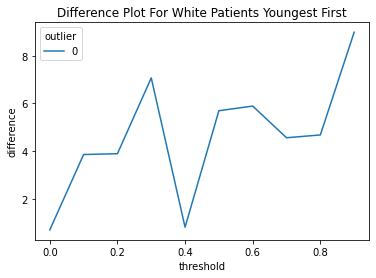

In [16]:
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'Youngest First'])
plt.title('Difference Plot For White Patients Youngest First')

Text(0.5, 1.0, 'Difference Plot For White Patients Max Life Years')

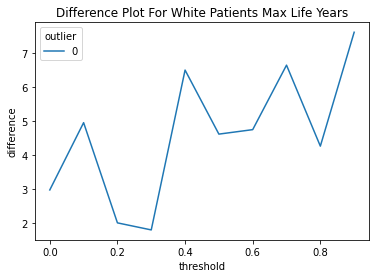

In [17]:
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'Max Life Years'])
plt.title('Difference Plot For White Patients Max Life Years')

Text(0.5, 1.0, 'Difference Plot For White Patients Sickest First')

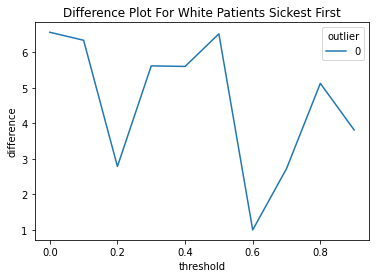

In [18]:
sn_plot = sn.lineplot(x='threshold', y='difference', 
                        hue='outlier', 
                      data=all_df[all_df['type'] == 'Sickest First'])
plt.title('Difference Plot For White Patients Sickest First')